# Convolutioneel Neuraal Netwerk

In deze opdracht ga je een model opbouwen om op basis van een aantal MRI-scans te detecteren of een persoon een hersentumor heeft of niet.

Hiervoor maken we gebruik van [deze dataset](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection) die een 253 scans bevat.

Doorheen deze oefening ga je de volgende stappen uitvoeren:
* Data downloaden en inladen
* Data augmentation
* Data modelling
* Model evaluation

Plaats je code voor deze delen in de stappen hieronder. Vergeet ook zeker niet de bijhorende vragen te beantwoorden.

Evaluatie:
* Code-correctheid: 30%
* Code-netheid/kwaliteit: 20%
* Beantwoorde vragen: 50%

**Opgepast:** Laat de output staan zodat het eenvoudiger is om je bekomen resultaten te interpreteren

In [56]:
# plaats alle benodigde imports hier
import opendatasets as od
import keras
import matplotlib.pyplot as plt

## Data downloaden en inladen

Download in de code-cellen hieronder de dataset en lees deze in. Zorg ervoor dat je een trainings en validatiedata hebt.
Een testset moet niet apart gehouden worden

Vragen:
* Hoe is de dataset gestructureerd?
* Hoe vind je de labels?
* Is er een splitsing tussen trainings/validatie/testdata of moet je dit zelf verzorgen?
* Hoeveel beelden kan je overhouden voor validatiedata?
* Met het aantal beelden in deze dataset: op welke manieren kan je er toch voor zorgen dat je een goed getrained model kan bekomen.

**Antwoord:**

In [57]:
# downloaden dataset
od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection")

Skipping, found downloaded files in ".\brain-mri-images-for-brain-tumor-detection" (use force=True to force download)


In [58]:
# Inlezen dataset
train_ds = keras.utils.image_dataset_from_directory("./brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/", 
                                            image_size=(300,300),
                                            validation_split=0.2,
                                            seed=123,
                                            subset='training')

print(train_ds.class_names)

val_ds = keras.utils.image_dataset_from_directory("./brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/", 
                                            image_size=(300,300),
                                            validation_split=0.2,
                                            seed=123,
                                            subset='validation')

def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=32)
  ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

Found 253 files belonging to 2 classes.


Using 203 files for training.
['no', 'yes']
Found 253 files belonging to 2 classes.
Using 50 files for validation.


## Data augmentation

Maak een sequentieel model aan met minstens 4 augmentatie stappen. Plaats ook de nodige preprocessing stappen in dit model.
Beantwoord ten slotte de volgende vragen.

Vragen:
* Wat zijn de belangrijkste parameters van de verschillende preprocessing lagen? Wat is het effect van deze parameter. **Let op:** wees hierbij zo duidelijk mogelijk. Vermeld bijvoorbeeld bij de Rescaling layer niet alleen de scale is 0.5 maar zeg ook dat hierdoor alle pixelwaarden gedeeld worden door 2 waardoor het bereik tussen 0 en 100 valt. (Vergeet ook de default parameters niet)

**Antwoord:**

In [59]:
# Sequentieel data augmentation model
preprocessor = keras.models.Sequential([
    keras.layers.RandomFlip(),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomBrightness((-0.005, 0.2)),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomContrast(0.1),   
    keras.layers.Rescaling(1./255), 
    keras.layers.Resizing(300,300)
])

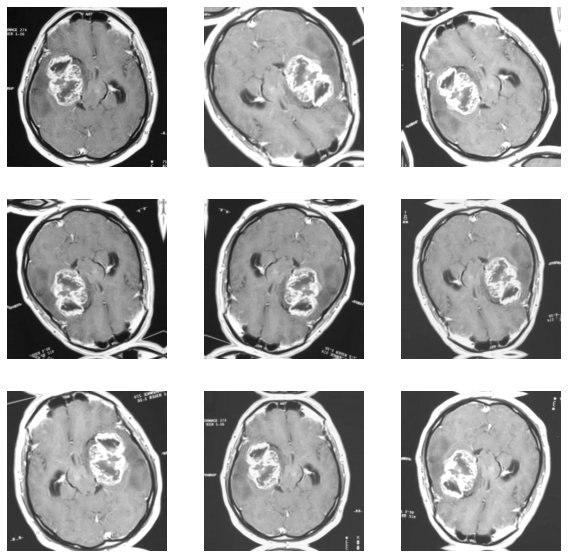

In [60]:
# plot image en 9 variations
def draw_figures(data_augmentation, image):
    
    tmp = tf.cast(tf.expand_dims(image, 0), tf.float32)
   
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        if i > 0:
            augmented_image = data_augmentation(tmp)
            plt.imshow(augmented_image[0])
        else:
            plt.imshow(image/255.0)
        plt.axis("off")

images, labels = next(iter(train_ds.take(1)))
image = images[0]

draw_figures(preprocessor, image)

## Data modelling

Stel nu een convolutioneel neuraal netwerk op met minstens 3 convolutionele lagen.
Zorg dat de structuur van het neuraal netwerk voldoet aan de best practices gezien in de les.
Train het model en toon een geschiedenis van het leerproces waarbij je kijkt naar de accuracy, precision en recall.

Vragen:
* Geef een korte beschrijving van hoe de verschillende types lagen werken. 
* Waarom is het aangeraden om met convolutionele lagen te werken ipv fully-connected lagen?
* Welke types hyperparameter heb je gebruikt in de verschillende lagen. Wees opnieuw ook hier voldoende duidelijk door de betekenis van de hyperparameter op de tensors uit te leggen. (max 5 zinnen per parameter)
* Geef hieronder voor elke laag (niet van het data augmentation gedeelte) weer welke hyperparameters je gekozen hebt en welke input en output dimensies er verwacht worden. Een voorbeeld van de verwachte output zie je hieronder.
* Welke loss functie heb je nodig en waarom?
* Wat is de activatiefunctie in de laatste laag en waarom?

**Antwoord:**

* Laag 1: Convolutionele Laag
    * Input dimensies: 200 x 200 x 3
    * Output dimensies: ....
    * Num kernels:
    * Kernel size:
    * Stride: 
    * Padding: 
    

In [69]:
# create complete model
model = keras.models.Sequential([
    preprocessor,
    keras.layers.Conv2D(5, 3, 1, "same"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(15, 3, 1, "same"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(30, 3, 1, "same"),       # typisch willen we het aantal feature-maps laten toenemen hoe dieper we gaan omdat er meer opties zijn om te detecteren
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),                      # zet de figuur om naar een 1d-tensor
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

7/7 [==============================] - 1s 94ms/step


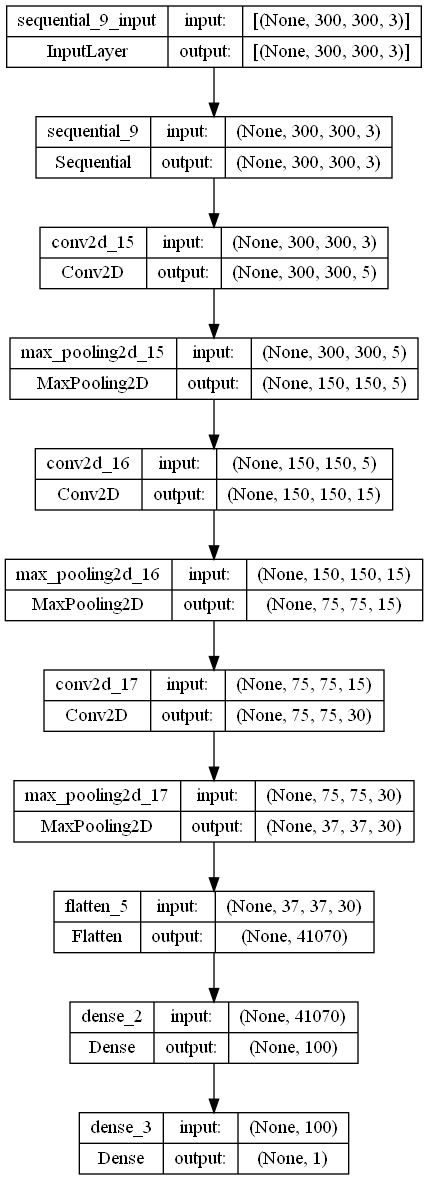

In [62]:
# validate output dimensions
model.predict(train_ds)

keras.utils.plot_model(model, show_shapes=True)

In [67]:
# train model
model.compile(optimizer="adam", 
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy', keras.metrics.Precision(name="precision"), keras.metrics.Recall(name="recall")]
              )

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


7/7 [==============================] - 4s 474ms/step - loss: 0.4852 - accuracy: 0.7882 - precision: 0.7985 - recall: 0.8699 - val_loss: 0.3728 - val_accuracy: 0.8400 - val_precision: 0.9286 - val_recall: 0.8125
Epoch 2/10
7/7 [==============================] - 3s 457ms/step - loss: 0.4192 - accuracy: 0.8128 - precision: 0.8346 - recall: 0.8618 - val_loss: 0.3769 - val_accuracy: 0.8600 - val_precision: 0.8571 - val_recall: 0.9375
Epoch 3/10
7/7 [==============================] - 3s 462ms/step - loss: 0.4107 - accuracy: 0.8128 - precision: 0.8148 - recall: 0.8943 - val_loss: 0.3948 - val_accuracy: 0.8600 - val_precision: 0.9310 - val_recall: 0.8438
Epoch 4/10
7/7 [==============================] - 3s 463ms/step - loss: 0.3836 - accuracy: 0.8227 - precision: 0.8537 - recall: 0.8537 - val_loss: 0.3907 - val_accuracy: 0.8800 - val_precision: 0.8824 - val_recall: 0.9375
Epoch 5/10
7/7 [==============================] - 3s 439ms/step - loss: 0.4838 - accuracy: 0.7537 - precision: 0.7786 - rec

## Model evaluation

Na het trainen van het model kunnen we evalueren of het gebouwde model goed werkt.

Beantwoord hiervoor de volgende vragen:
* Maak een plot van de trainings error en validation accuracy en f1-score van het getrainde model modellen
* Bespreek op basis van deze figuren of het model aan het over/underfitten is.
* Hoe zou je overfitten tegengaan?
* Hoe zou je underfitten tegengaan?
* Je hebt in de history toegang tot de precision, recall en accuracy. Welk van deze metrieken is belangrijk voor deze dataset als we geen false positives willen.

**Antwoorden:...**

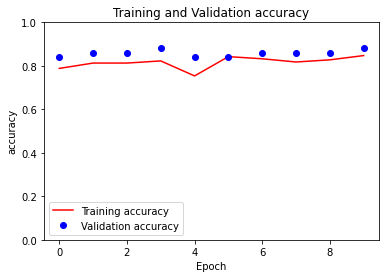

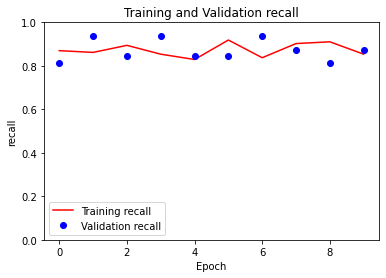

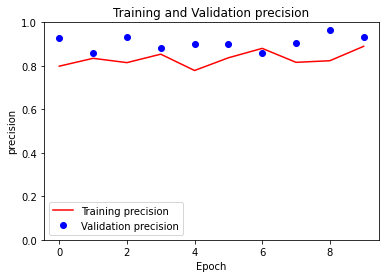

In [68]:
# Evaluation en plots
def plot_metric(metric_name='loss'):
    train_metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    plt.figure()
    plt.plot(history.epoch, train_metric, 'r', label='Training ' + metric_name)
    plt.plot(history.epoch, val_metric, 'bo', label='Validation ' + metric_name)
    plt.title('Training and Validation ' + metric_name)
    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.ylim([0, 1])
    plt.legend()
    plt.show()  

plot_metric('accuracy')
plot_metric('recall')
plot_metric('precision')

## Verbeterde model

Maak nu een tweede model dat probeert betere resultaten te halen dan het bovenstaande model.
Hierbij mag je gebruik maken van alle technieken die je wil.
Er is hierbij maar 1 voorwaarde: **maak gebruik van de BatchNormalization layer**.
Train en evalueer dit model ook en vergelijk het met het vorige.
Indien je bij het vorige model over/underfitting opgemerkt hebt, pak dit aan in dit model.

Vragen:
* Bespreek de structuur van het model (niet elke hyperparameter meer maar enkel de gekozen lagen). Waarom heb je de wijzigingen doorgevoerd?
* Wat doet de batchnormalization layer? Wat is de beste plaats voor deze laag toe te voegen?
* Bespreek hoe je over/underfitting hebt aangepakt
* Bespreek de behaalde resultaten

**Antwoord:**

Epoch 1/10
7/7 [==============================] - 7s 769ms/step - loss: 0.9205 - accuracy: 0.7340 - precision: 0.8224 - recall: 0.7154 - val_loss: 1.2797 - val_accuracy: 0.7200 - val_precision: 0.7812 - val_recall: 0.7812
Epoch 2/10
7/7 [==============================] - 5s 776ms/step - loss: 0.5676 - accuracy: 0.7635 - precision: 0.7953 - recall: 0.8211 - val_loss: 1.3114 - val_accuracy: 0.6400 - val_precision: 0.6522 - val_recall: 0.9375
Epoch 3/10
7/7 [==============================] - 5s 730ms/step - loss: 0.5234 - accuracy: 0.7340 - precision: 0.7717 - recall: 0.7967 - val_loss: 1.2225 - val_accuracy: 0.6400 - val_precision: 0.6522 - val_recall: 0.9375
Epoch 4/10
7/7 [==============================] - 5s 772ms/step - loss: 0.4655 - accuracy: 0.7685 - precision: 0.7969 - recall: 0.8293 - val_loss: 1.3573 - val_accuracy: 0.6800 - val_precision: 0.6818 - val_recall: 0.9375
Epoch 5/10
7/7 [==============================] - 6s 834ms/step - loss: 0.4423 - accuracy: 0.8079 - precision: 0

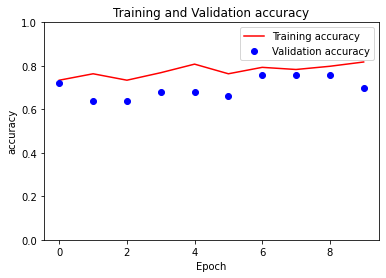

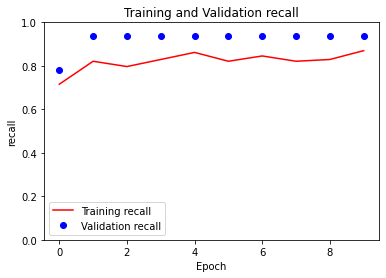

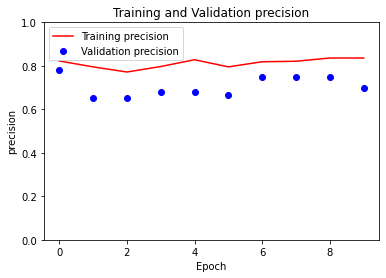

In [71]:
# Model met batchnormalization
model = keras.models.Sequential([
    preprocessor,
    keras.layers.Conv2D(5, 3, 1, "same", activation="linear"),
    keras.layers.BatchNormalization(),          # er is wat discussie over of het net voor of net voor niet-lineaire functies moet, meeste bronnen zijn net na
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D(),     
    keras.layers.Conv2D(15, 3, 1, "same"),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(30, 3, 1, "same"),       # typisch willen we het aantal feature-maps laten toenemen hoe dieper we gaan omdat er meer opties zijn om te detecteren
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),                      # zet de figuur om naar een 1d-tensor
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

# train model
model.compile(optimizer="adam", 
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy', keras.metrics.Precision(name="precision"), keras.metrics.Recall(name="recall")]
              )

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

plot_metric('accuracy')
plot_metric('recall')
plot_metric('precision')